# Adapter ses compétences aux besoins du marché du travail

## Introduction  
Aujourd'hui, plus que jamais dans l'histoire, nous vivons dans une ère où rien n'est figé. Ce qu'on connait aujourd'hui risque de changer demain dans le but d'accroître l'efficacité des facteurs de production. Il arrive des fois que les compétences enseignées par les universités où les instituts d'études supérieures soient en retard par rapport aux standards des entreprises, voilà pourquoi il est important de se mettre à jour sur les avancées technologiques afin de bien se positionner sur le marché du travail.   
Dans cet article j'aimerais avoir une idée sur les compétences que demandent les entreprises aujourd'hui ainsi que le niveau de formation qu'ils exigent pour les métiers de data science / analytics.  
  
  
Pour ce faire je travaillerai avec le langage Python pour scraper le site Indeed par le biais des mots clés.

In [1]:
# Importons les librairies
import pandas as pd
from requests import get
from requests.exceptions import RequestException
from bs4 import BeautifulSoup

Le langage Python est riche et facile à manier pour ce genre de tâche, il contient de nombreuses librairies pour faire presque tout ce qu'on veut.  
Dans cet article j'utilise les librairies `Pandas`, `BeautifulSoup` et le module `requests` qui fait partie de la librairie standard pour conduire ce projet. 

# Le site `Indeed`
Indeed est un site web américain spécialisé dans la mise en relation entre les entreprises et les demandeurs d'emploi. Des milliers d'offres d'emploi y sont présentes et ce site constitue un bon endroit pour scraper les offres d'emploi afin d'avoir des idées sur les compétences recherchées par les entreprises.  
Le site ressemble à ceci :
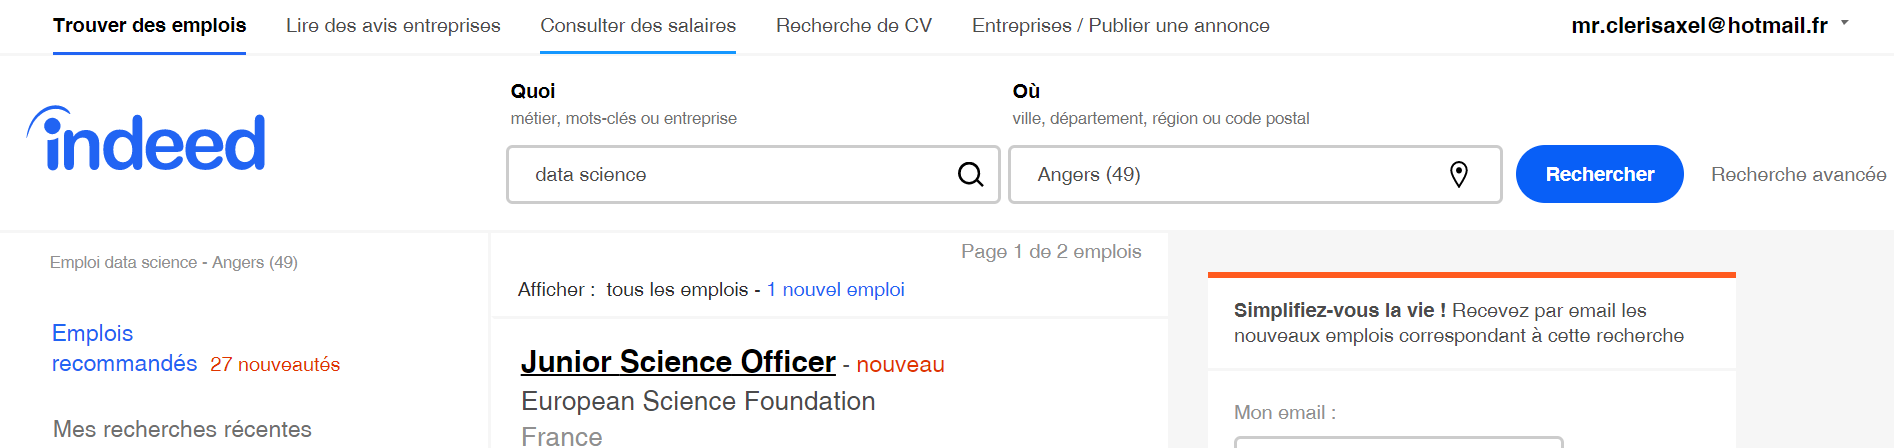

## Web scraping
Le web scraping est un terme anglophone utilisé pour désigner l'action de fouiller des informations sur un site web.  
Nous allons donc ici fouiller le site web d'Indeed pour le mot clé `data science` pour toutes les offres publiées pour la France.  

In [2]:
# Faisons une première requête, ceci équivaut à consulter la page sur un navigateur
url = """https://www.indeed.fr/emplois?as_and=data+science&as_phr=&as_any=&as_not=&as_ttl=&as_cmp=&jt=all&st=&as_
src=&salary=&radius=25&l=France&fromage=any&limit=100&sort=&psf=advsrch
"""
indeed = get(url)

Ici l'objet `indeed` enregistre les résultats bruts de recherche. Il s'agit d'une page HTML. Il nous faut filtrer cette page pour avoir l'information que nous cherchons.

## Nom des entreprises

In [3]:
soup = BeautifulSoup(indeed.text, "html.parser")

Nous venons d'utiliser la classe `BeautifulSoup` pour formatter l'objet `indeed` en quelque chose de plus structuré.

In [4]:
company = soup.find_all('span', {'class': 'company'})

In [5]:
entreprise = []
for comp in company:
    entreprise.append(comp.text.strip())

In [6]:
entreprise[0:4]

['Total', 'Total', 'BNP Paribas Personal Finance', 'Lucky Cart']

## Description des activités

In [7]:
resume = soup.find_all('div', {'class': 'summary'})

In [8]:
type(resume)

bs4.element.ResultSet

In [9]:
description = []
for desc in resume:
    description.append(desc.text.strip())

In [10]:
description[0:4]

['Promouvoir la data science. Gérer les pilotes data science (big data et/ou data mining), en coordination avec les autres métiers et entités....',
 'PhD (or MSc/ME with equivalent experience) in Data Science, Applied Mathematics, Statistics or a related discipline....',
 'Vous serez un facteur clé de la montée en compétence du Groupe en matière de Data Science, notamment par une veille technologique active sur les sujets Big Data...',
 '2 ans d’expérience mini en développement pour la data science avec au moins l’une des problématiques suivantes :....']

## Titre de l'offre

In [11]:
title = soup.find_all("div", {"class": "title"})
titre = []
for t in title:
    titre.append(t.text.strip())

In [12]:
titre[0:4]

['Data scientist H/F',
 'Data Science and Artificial Intelligence Research Scientist',
 'DATA SCIENTIST H/F',
 'Data Engineer']

## Lieu du travail

In [13]:
location = soup.find_all("span", {"class": "location"})
lieu = []
for loc in location:
    lieu.append(loc.text.strip())

Dans les codes HTML du site, le lieu apparaît à la fois sous les tags `span` et `div`. Donc il faut prendre en compte les deux.  
Et heureusement, les tags `div` sont les 8 derniers.

In [14]:
location_div = soup.find_all("div", {"class": "location"})
for loc in location_div:
    lieu.append(loc.text.strip())

In [15]:
lieu[0:4]

['Paris (75)', 'Paris (75)', 'Chilly-Mazarin (91)', 'Vélizy-Villacoublay (78)']

# Data frame

Maintenant que nous avons pu trouver les informations qui nous intéressent, nous pouvons maintenant assembler ces données dans un Data frame afin de les analyser.

In [16]:
list(map(len, [titre, entreprise, lieu, description]))

[59, 59, 59, 59]

Nous avons donc toutes les 58 locations. Créons notre objet Pandas.

In [17]:
data_science = pd.DataFrame({"titre": titre, "entreprise": entreprise,
             "lieu":lieu, "description": description})

In [18]:
data_science.head()

,titre,entreprise,lieu,description
0,Data scientist H/F,Total,Paris (75),Promouvoir la data science. Gérer les pilotes ...
1,Data Science and Artificial Intelligence Resea...,Total,Paris (75),PhD (or MSc/ME with equivalent experience) in ...
2,DATA SCIENTIST H/F,BNP Paribas Personal Finance,Chilly-Mazarin (91),Vous serez un facteur clé de la montée en comp...
3,Data Engineer,Lucky Cart,Vélizy-Villacoublay (78),2 ans d’expérience mini en développement pour ...
4,Ingénieur Big Data H/F,Naval Group,Toulon (83),Concevoir et développer des solutions pour les...


## Décrivons le jeu de données

In [19]:
data_science.describe()

,titre,entreprise,lieu,description
count,59,59,59,59
unique,56,48,25,57
top,Data Science and Artificial Intelligence Resea...,In-Team,Paris (75),PhD (or MSc/ME with equivalent experience) in ...
freq,2,4,23,2


Voici donc un simple tableau qui nous donne les statistiques descriptives du jeu de donnée.  
Sur les 5ç offres, 23 se trouvent à Paris (75). Regardons cela visuellement

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
# reglages
plt.rcParams["figure.figsize"] = [12,6]
plt.rcParams["figure.dpi"] = 300
plt.style.use("ggplot")

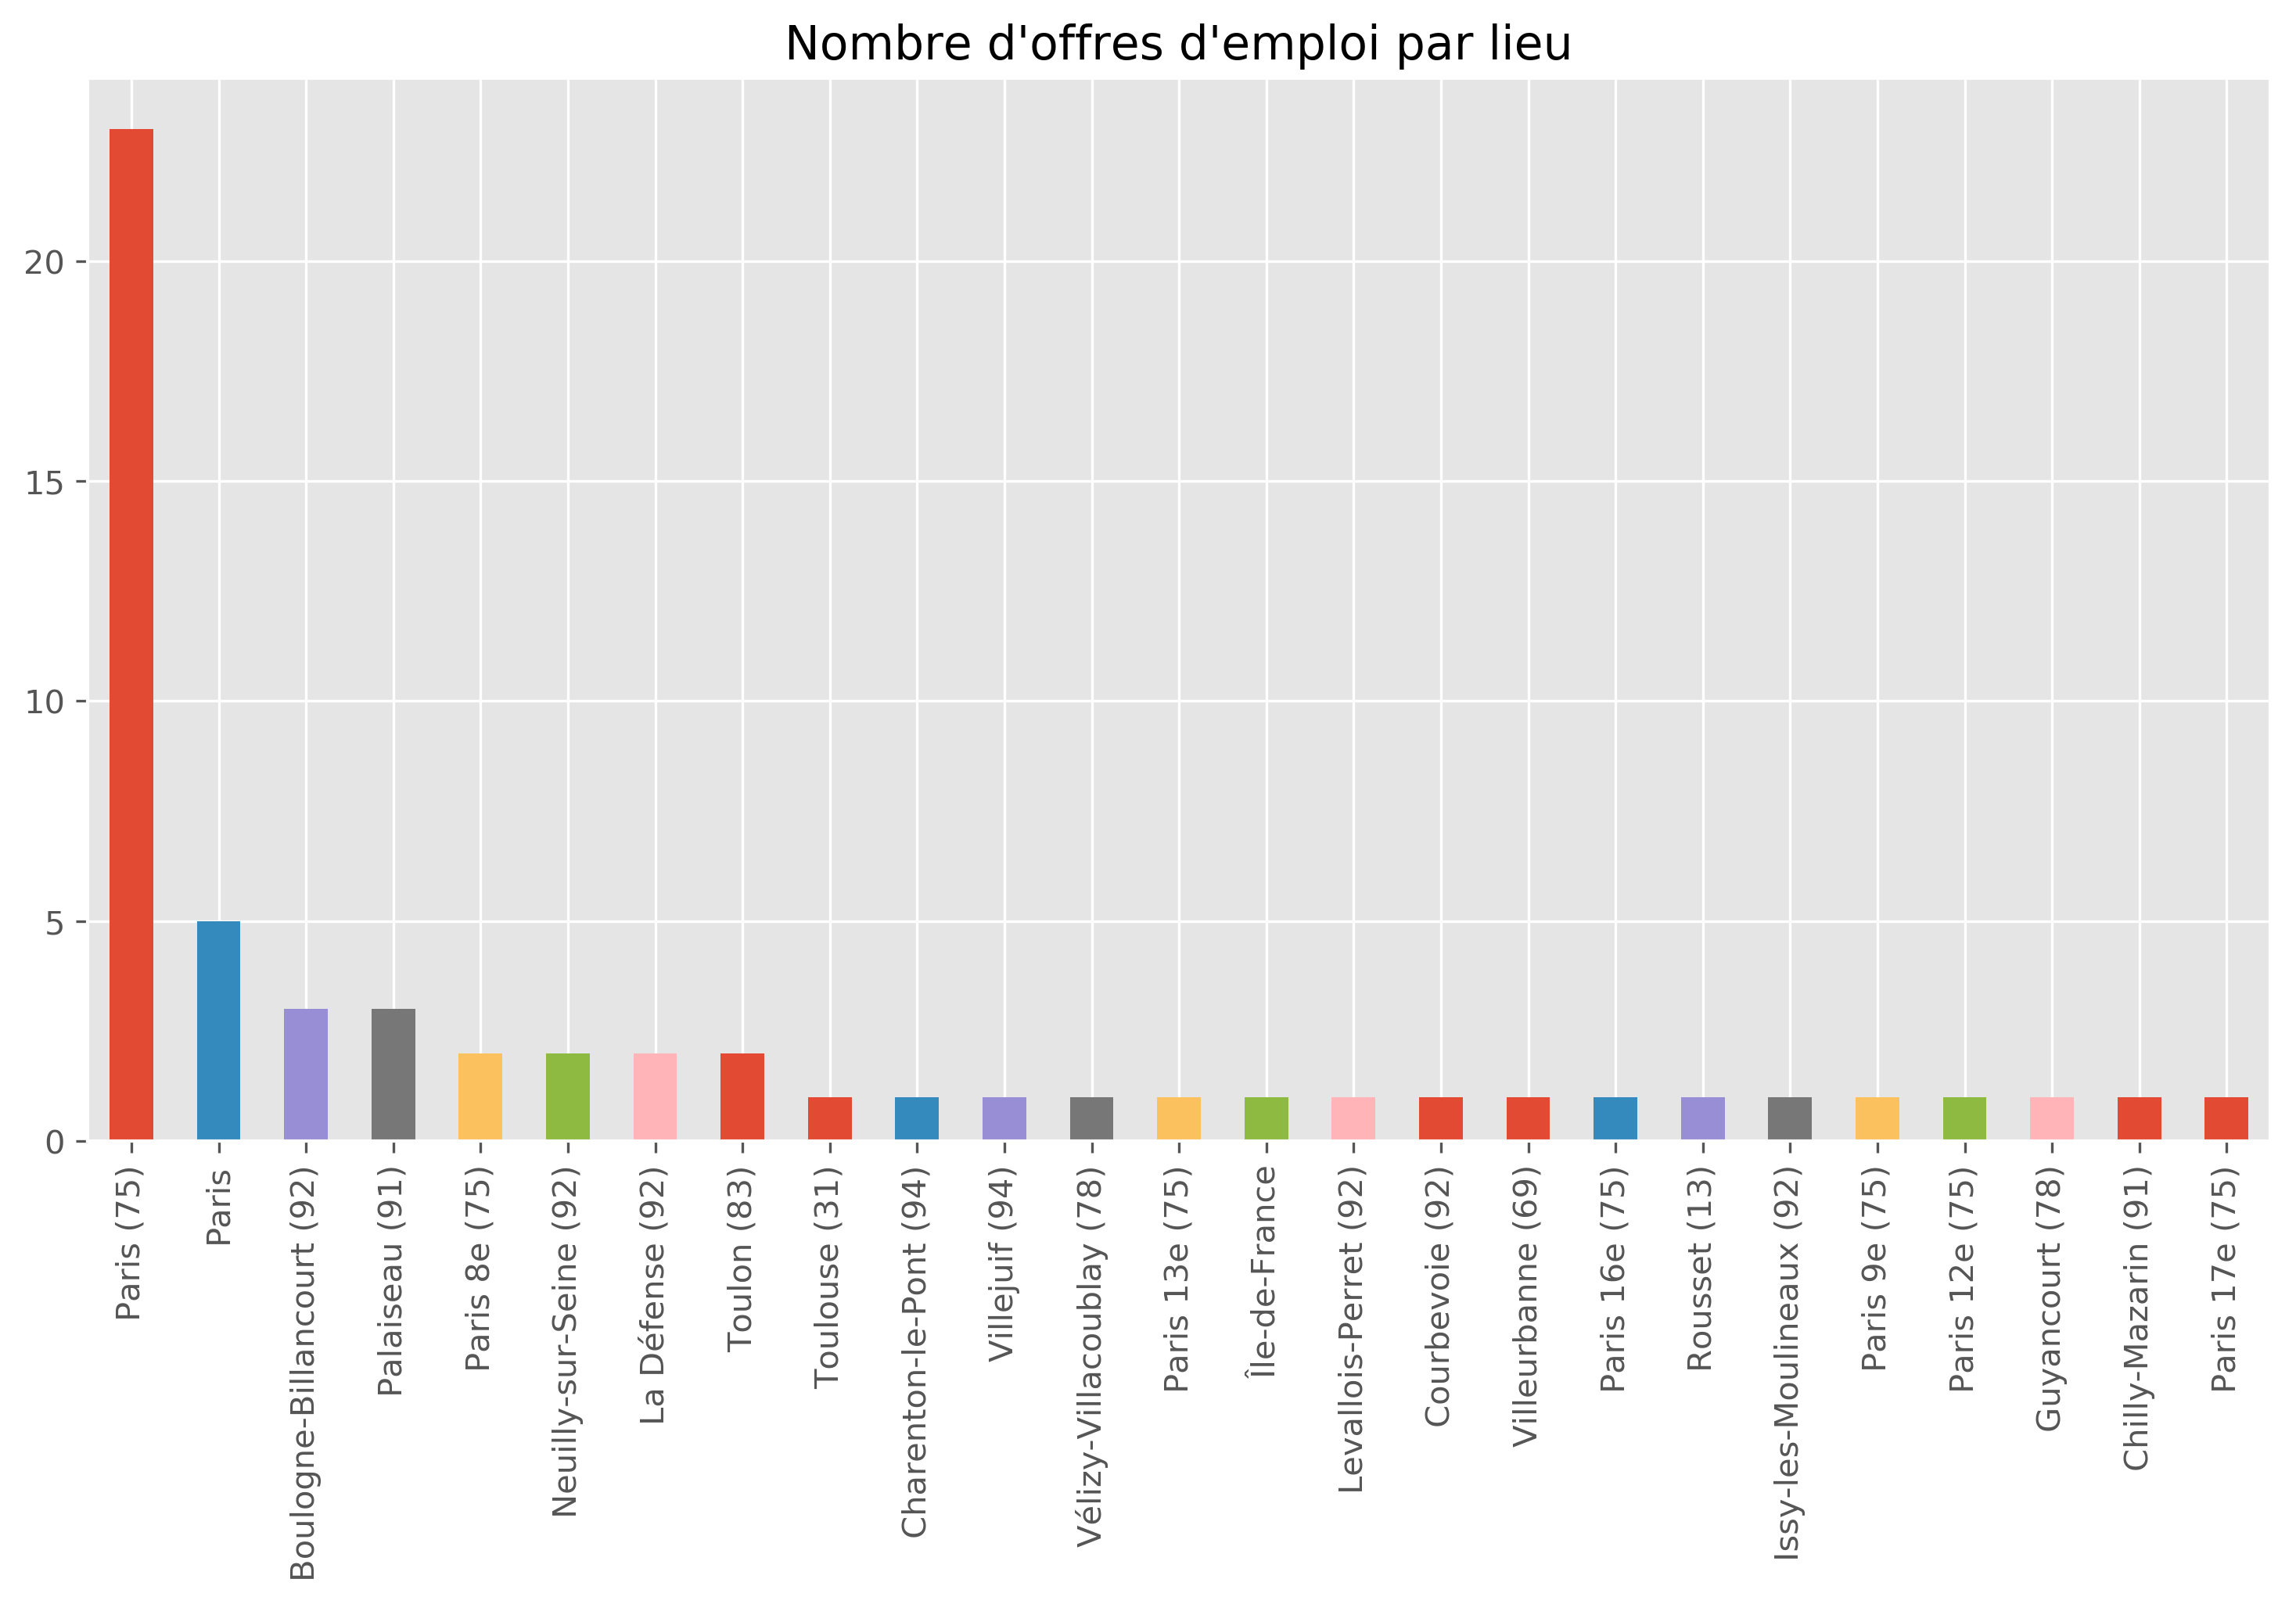

In [40]:
data_science["lieu"].value_counts().plot(kind = "bar")
plt.title("Nombre d'offres d'emploi par lieu");

Le constat est clair : presque toutes les offres d'emploi qui parlent de data science sont concentrées en région parisienne. Si quelqu'un se prépare donc exercer le métier de data scientist il faudra donc considérer à postuler dans les entreprises parisiennes. 

Et les entreprises ?

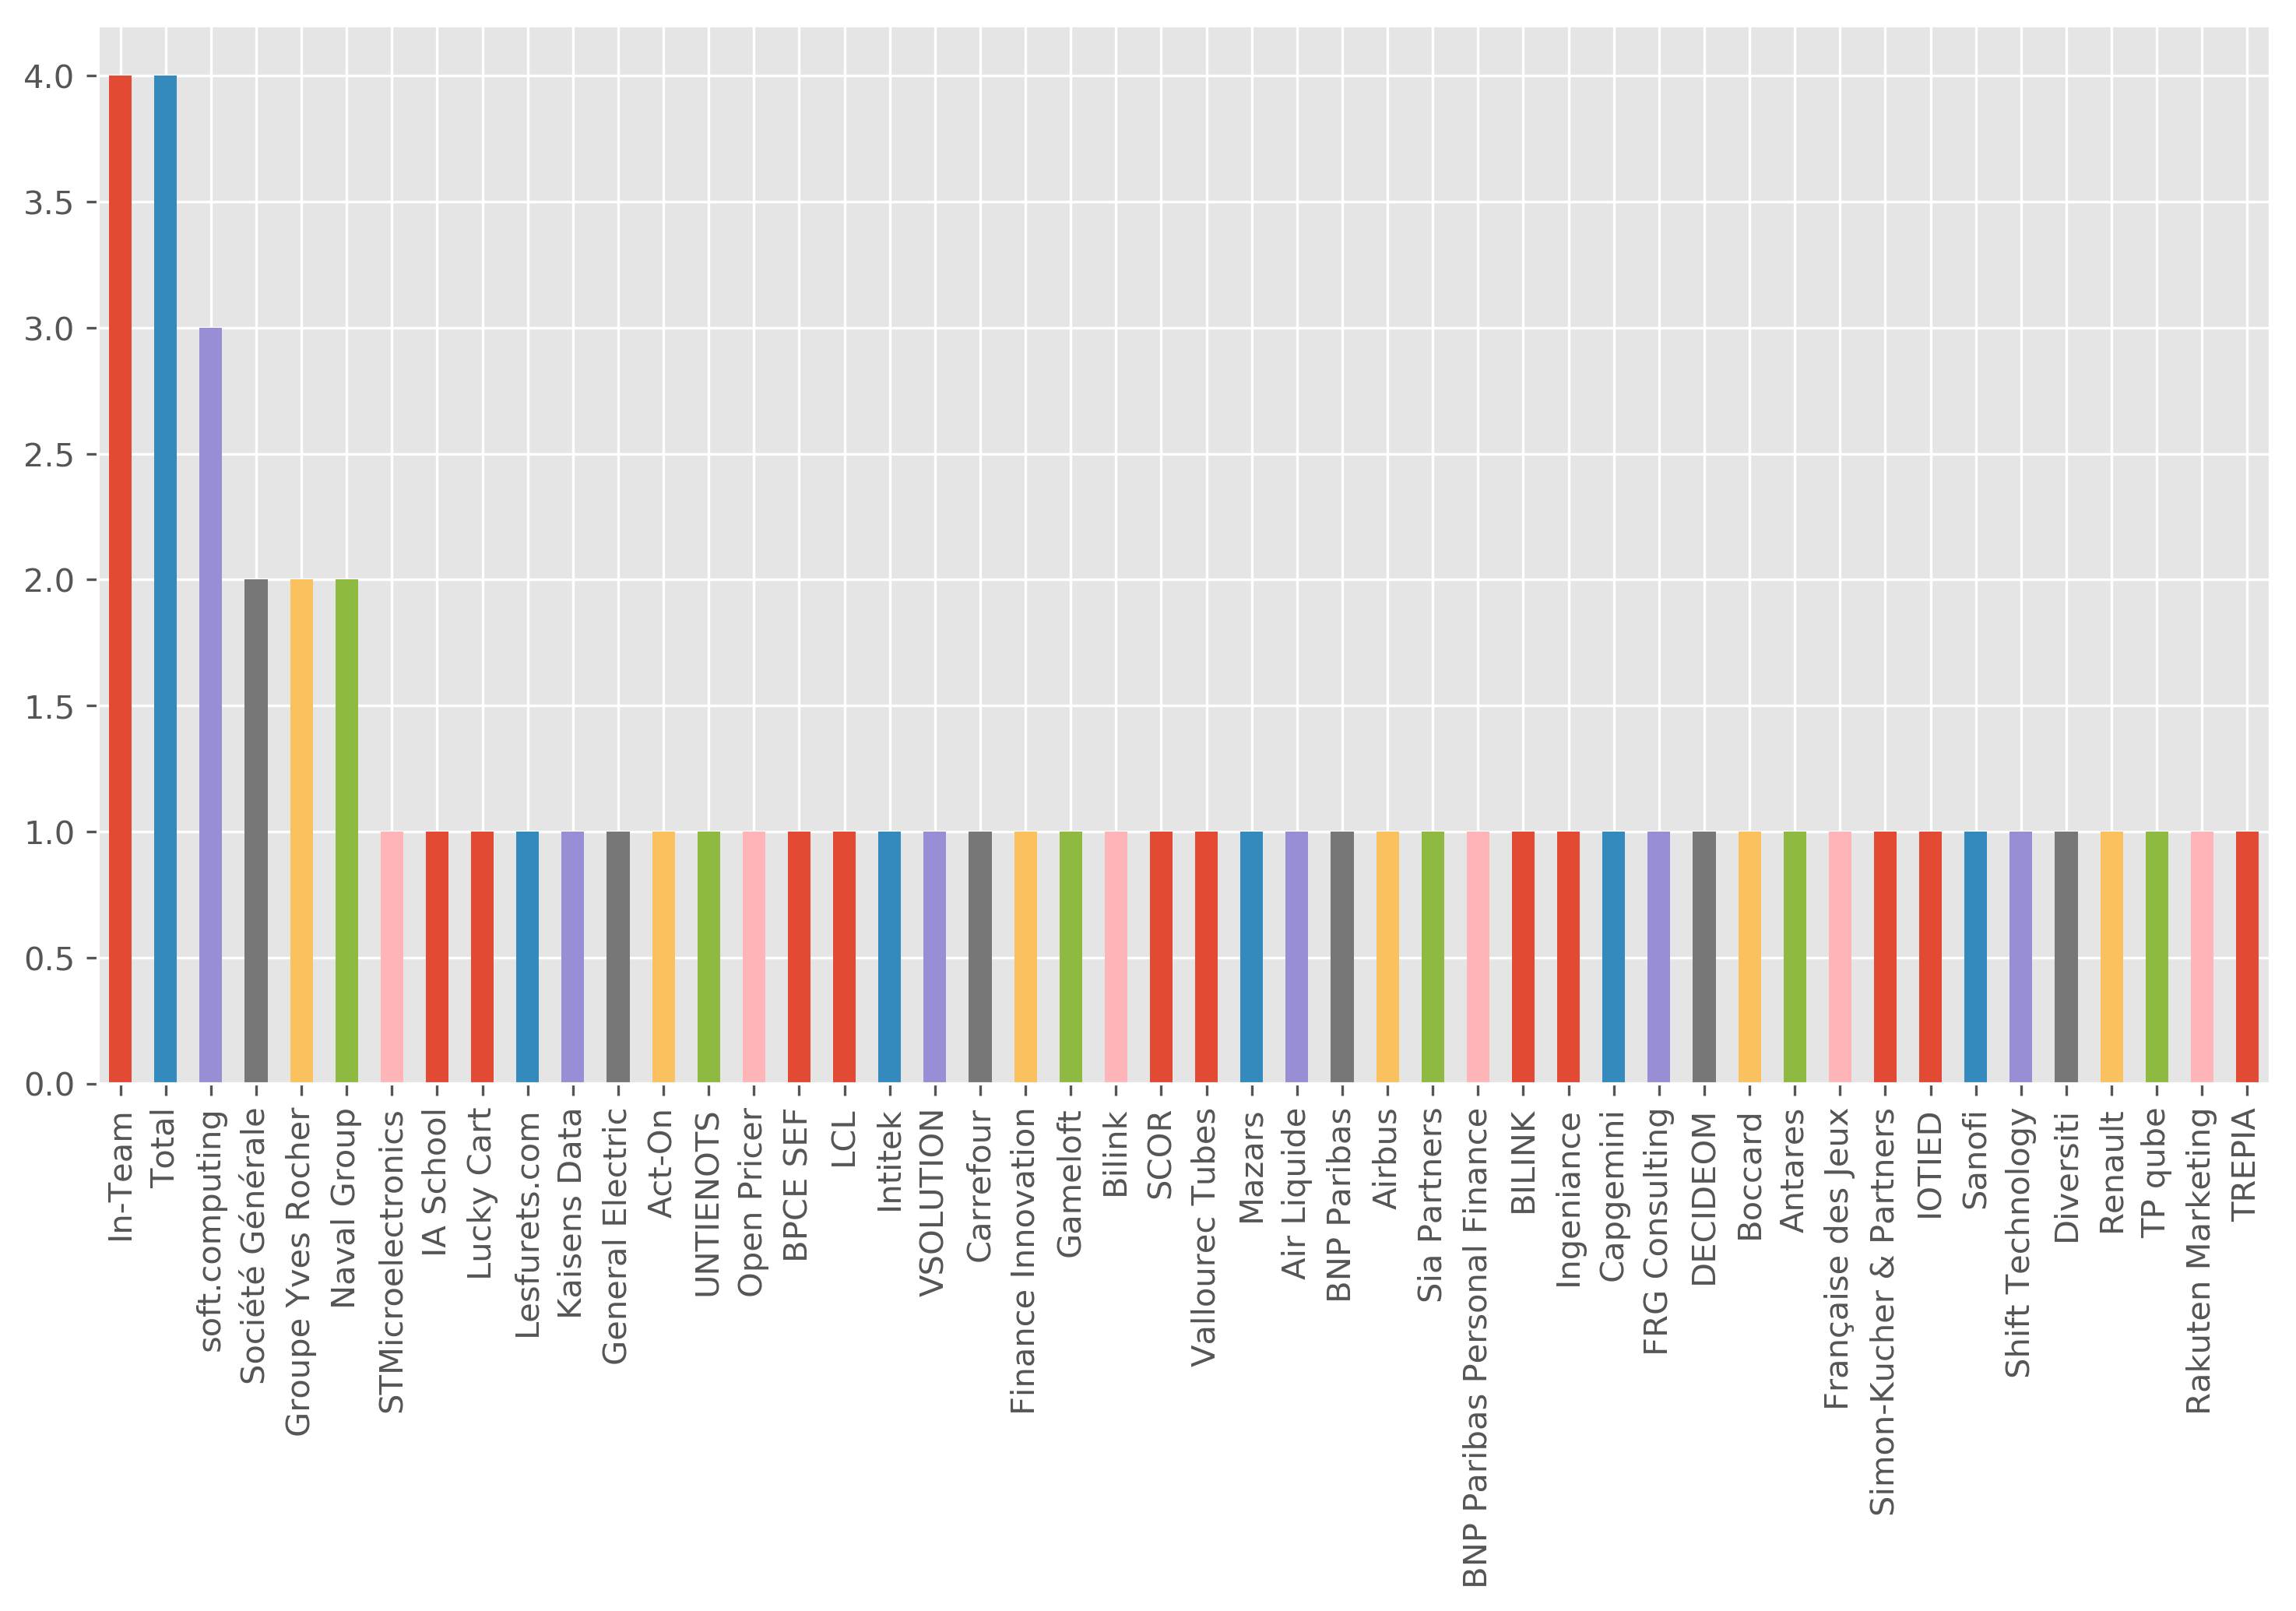

In [41]:
data_science["entreprise"].value_counts().plot(kind = "bar");

Les offres d'emploi par entreprise ne suivent aucune tendance. Il y a juste qu'à remarquer que la plupart de ces entreprises se situent en région parisienne.

## Analyse textuelle des titres et des descriptions

In [23]:
data_science["titre"].head()

0                                   Data scientist H/F
1    Data Science and Artificial Intelligence Resea...
2                                   DATA SCIENTIST H/F
3                                        Data Engineer
4                               Ingénieur Big Data H/F
Name: titre, dtype: object

Les titres ne suivent pas une structure définie, il nous faut d'abord les normaliser : enlever les ponctuations, les majuscules etc...

In [24]:
from string import punctuation

In [25]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
words = " ".join(titre).translate(str.maketrans("","", punctuation)).lower()

In [27]:
from wordcloud import WordCloud, STOPWORDS

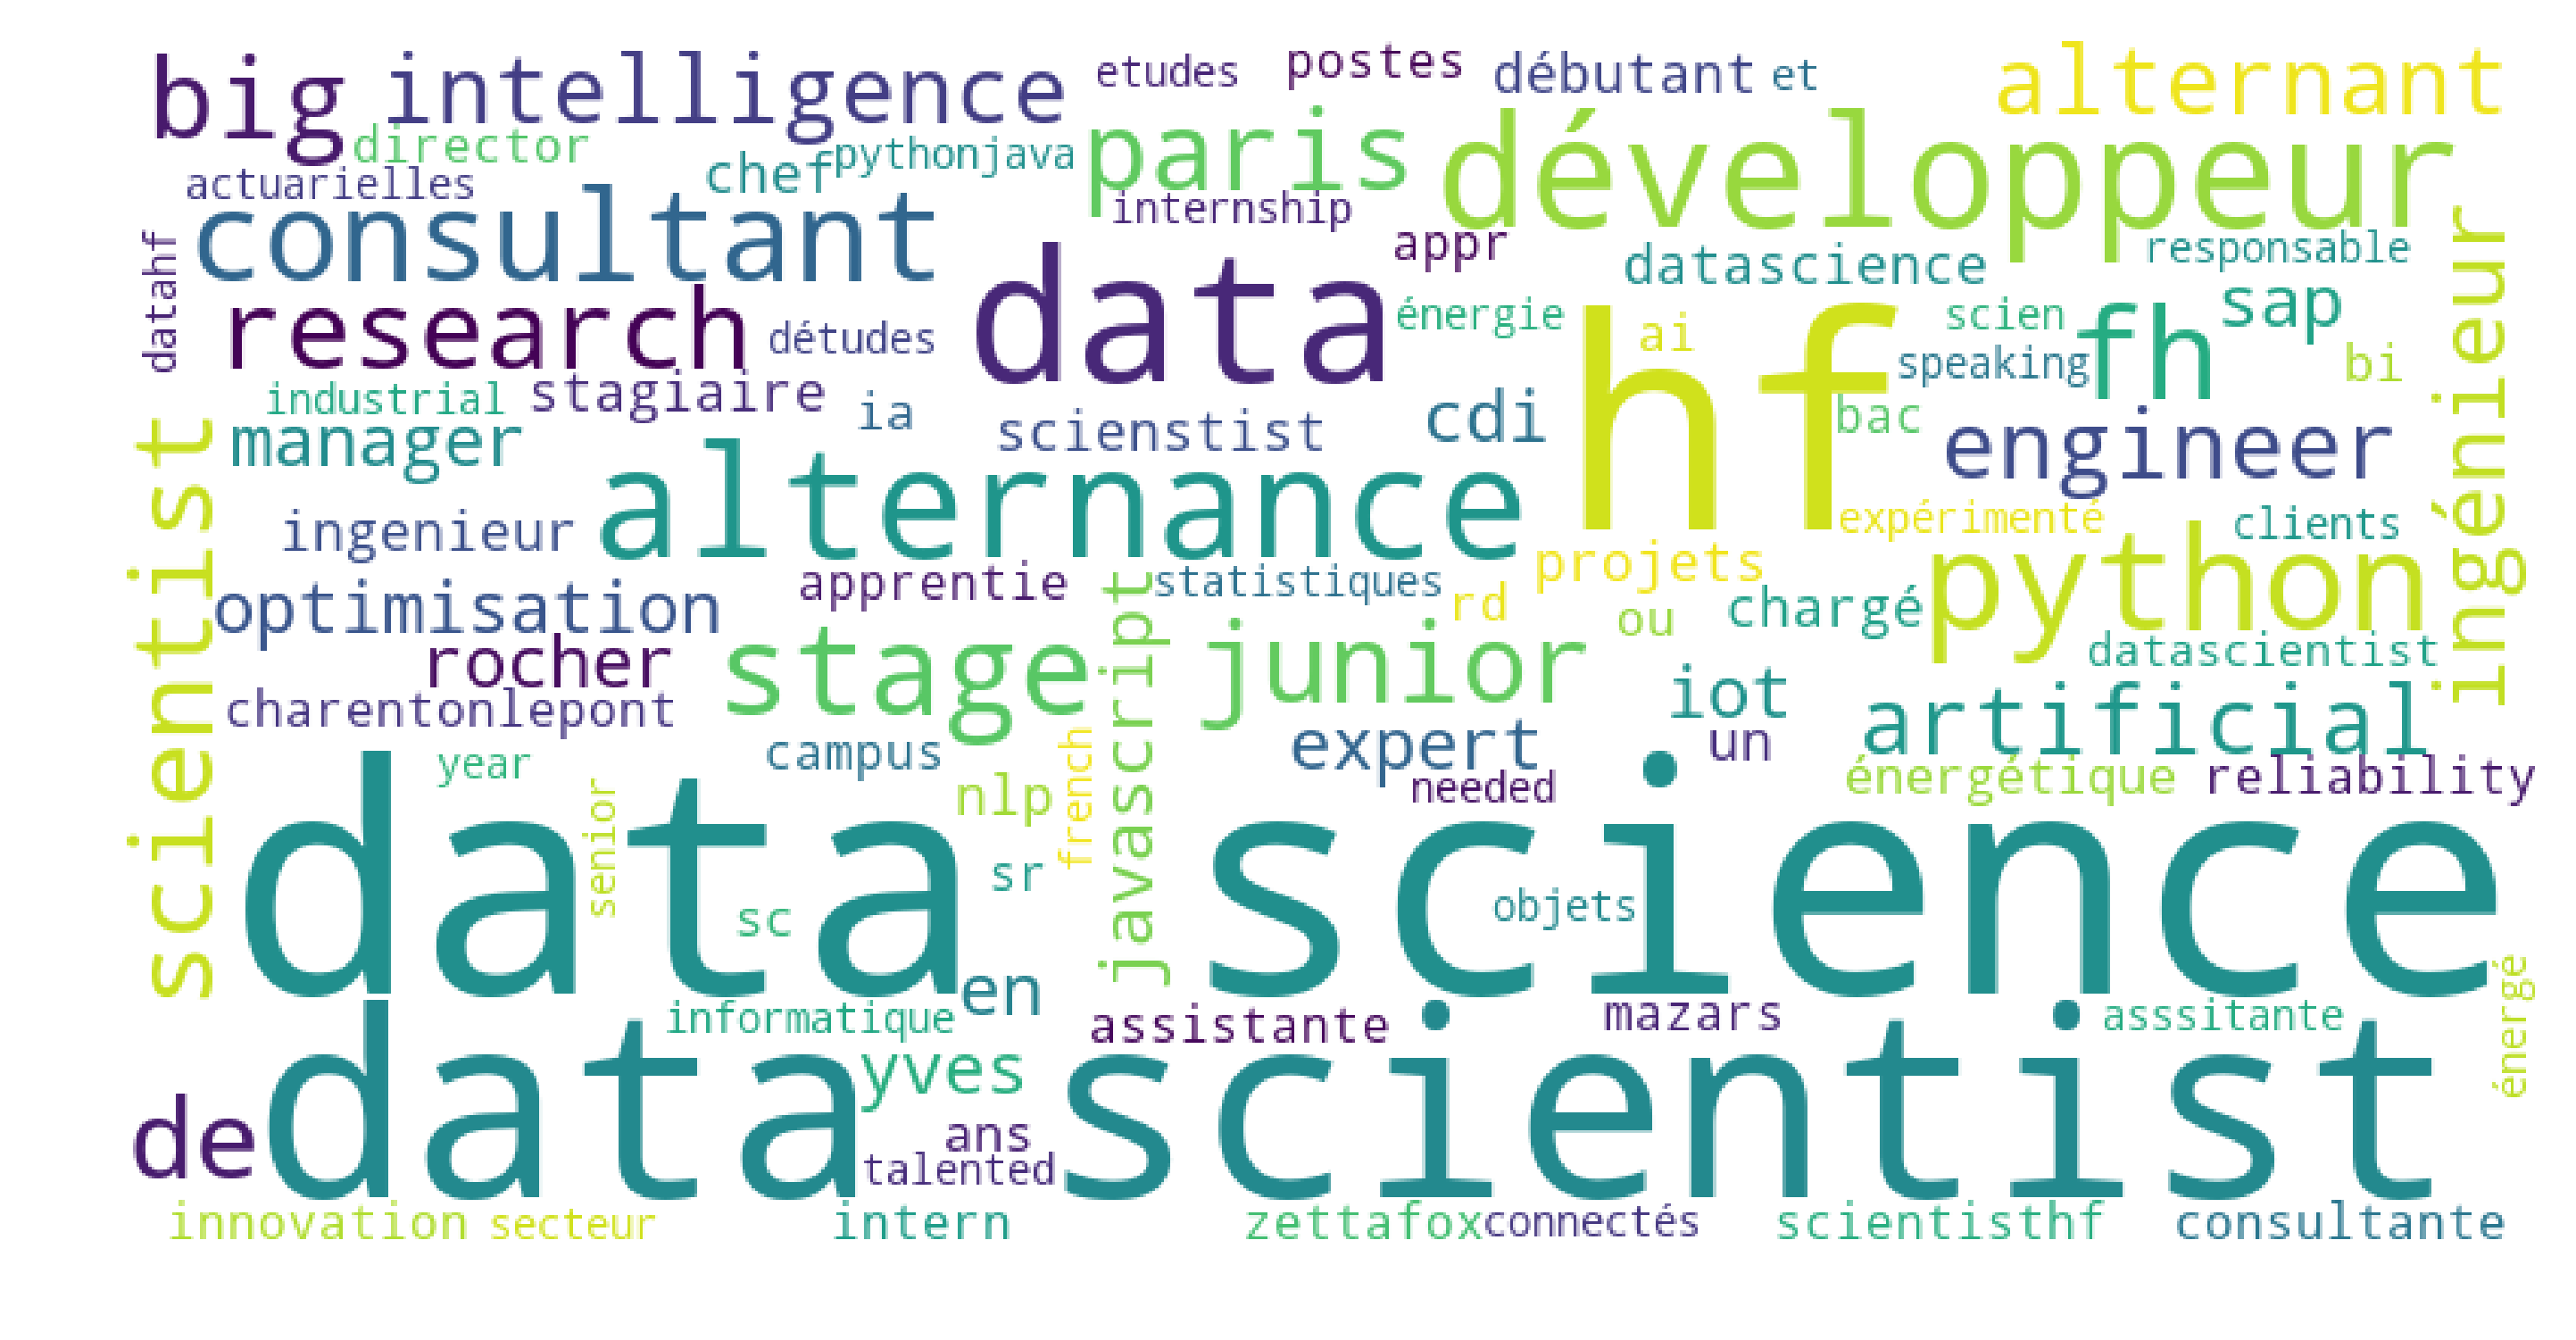

In [43]:
plt.rcParams["figure.dpi"] = 300
wc = WordCloud(background_color="white", width= 800, height= 400).generate(words)
plt.imshow(wc)
plt.axis("off");

Dans les titres on peut déjà avoir une idée de ce que cherchent les entreprises. Il y a plusieurs mots-clés qui reviennent dans les offres d'emploi.  
Les expressions `data science` et `data scientist` reviennent souvent mais n'ont pas réellement de sens puisque la data science est large. Pour avoir une idée des compétences et savoirs-faire, penchons nous sur les descriptions.

Pour n'avoir que les mots clés, il nous faut enlever les mots vides de la langue française. Ce sont des mots comme "de", "le", "la", "en". Ces mots existent pour embellir la langue et donner du sens dans une phrase or notre but est de chercher les mots clés.

In [29]:
from nltk.corpus import stopwords

In [30]:
mots_vides = stopwords.words("french")

In [31]:
update = ["les", "data", "science", "data science", "or", "tant", "d'une", "scientist"]
for word in update:
    mots_vides.append(word)

In [32]:
desc = data_science["description"].str.lower().str.translate(str.maketrans(" "," ", punctuation))

In [33]:
desc = " ".join(desc).split()

In [34]:
desc = " ".join([word for word in desc if word not in mots_vides])

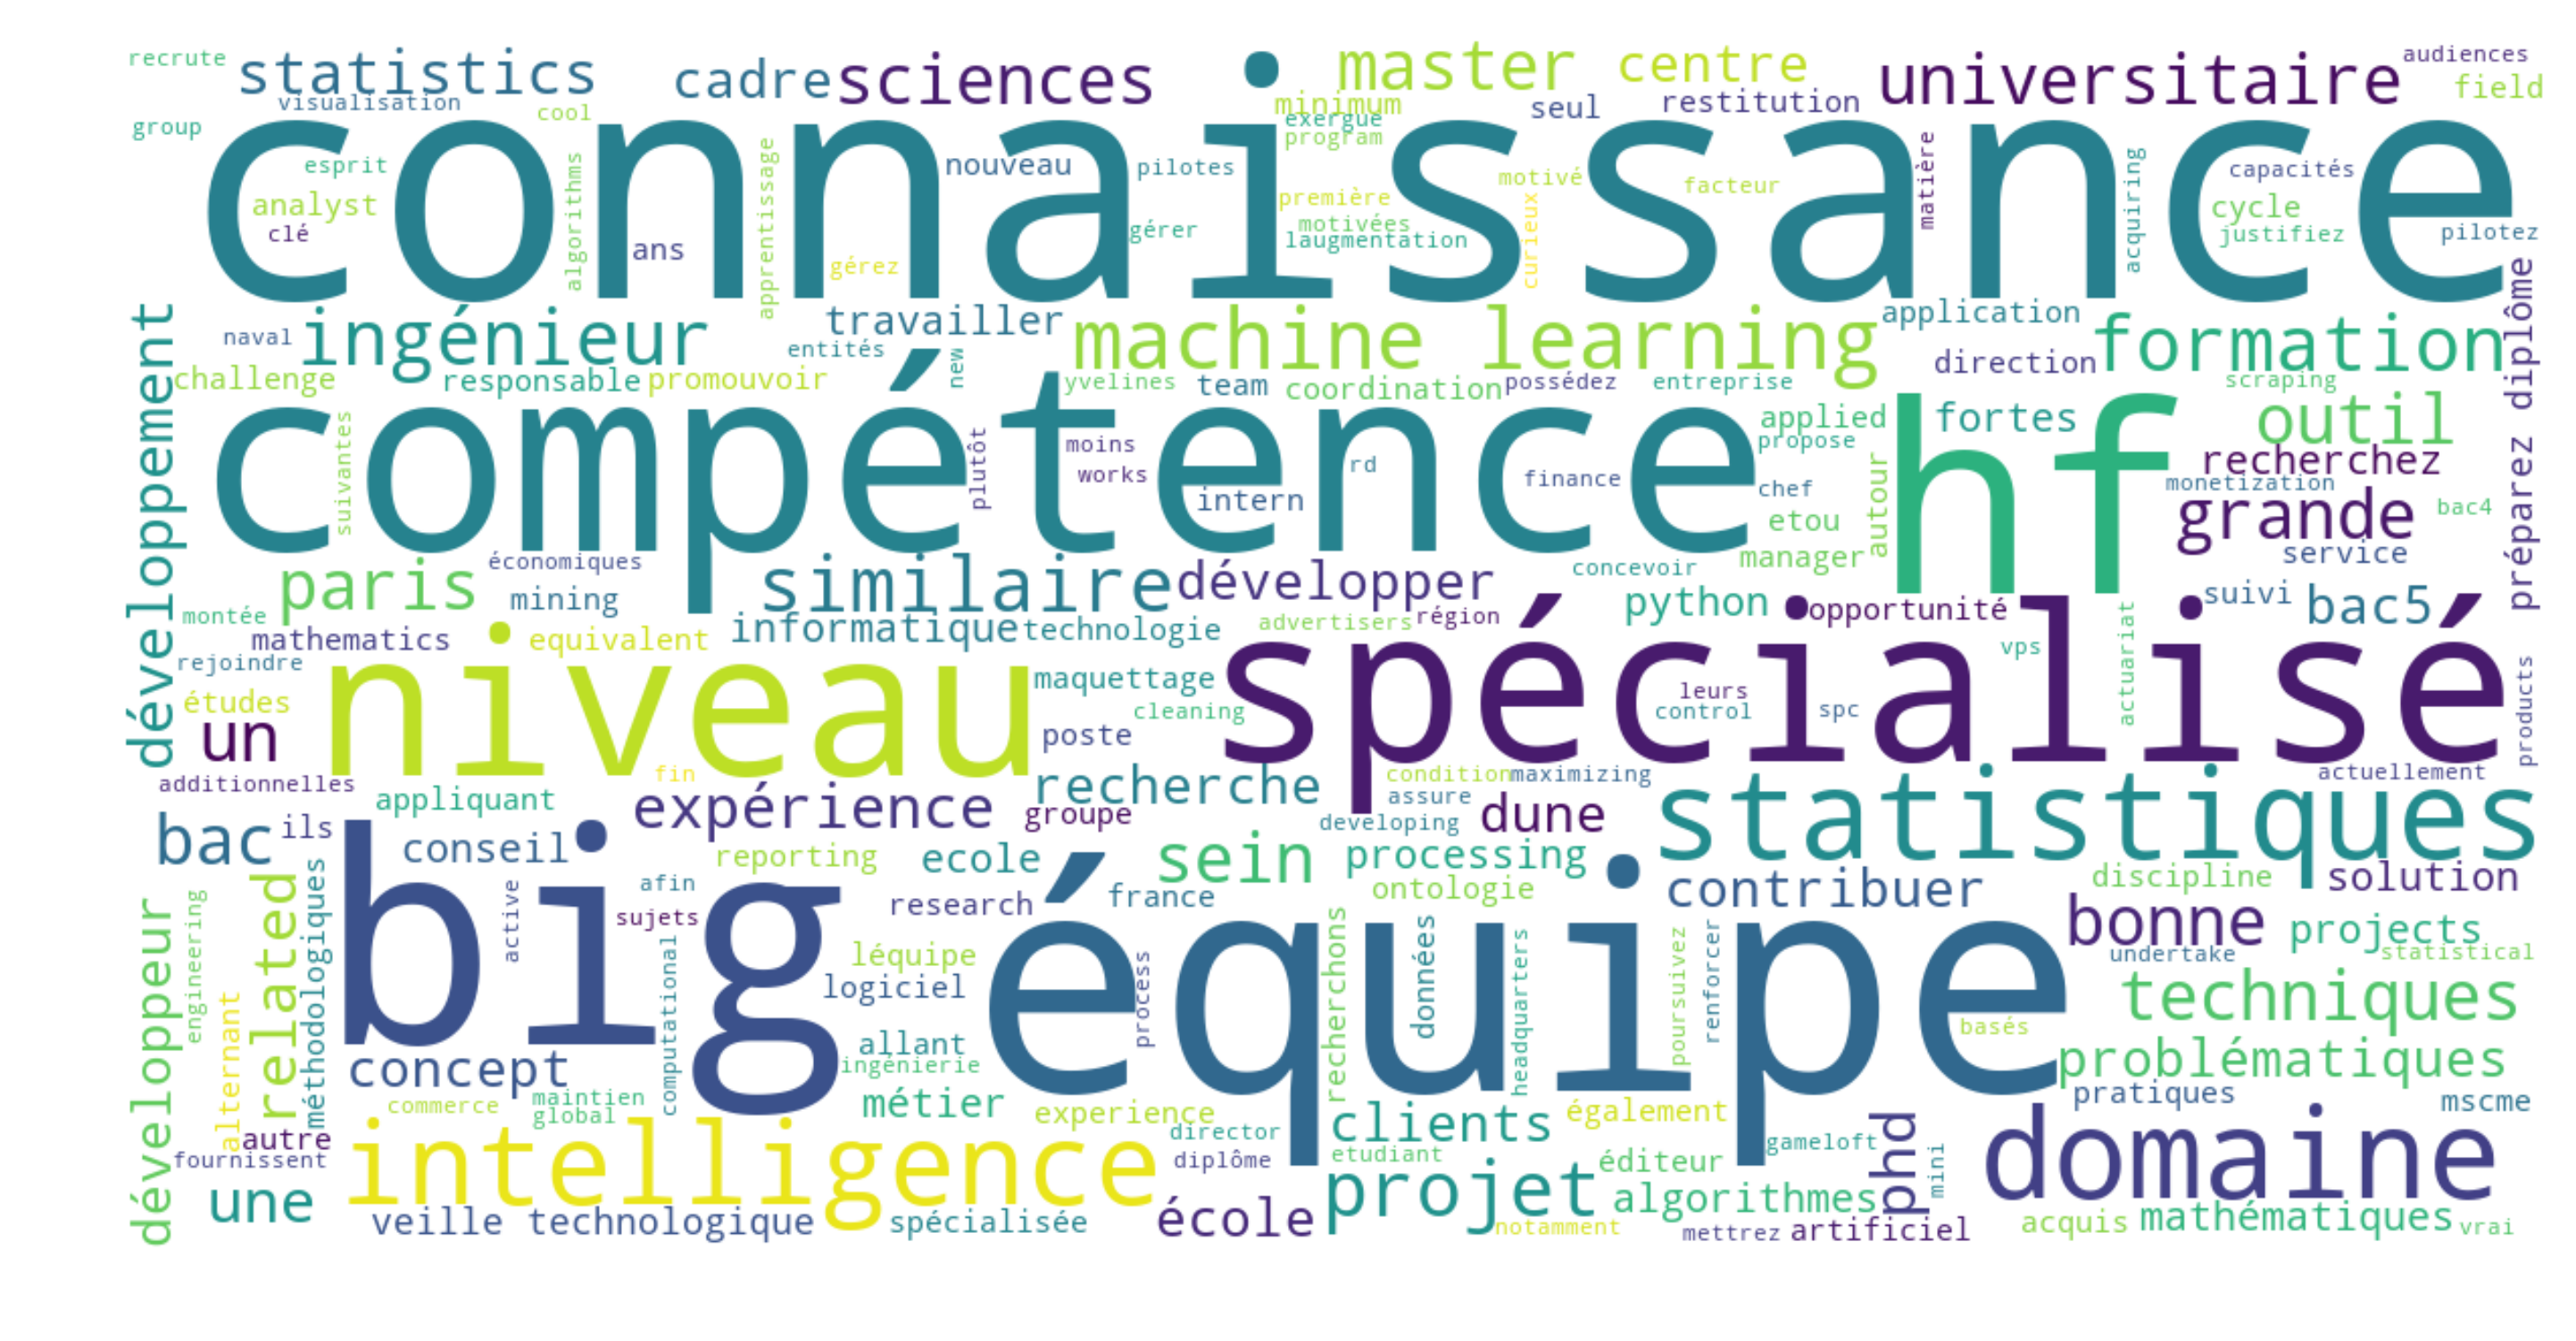

In [44]:
desc_wc = WordCloud(background_color= "white", width = 1200, height = 600).generate(desc)
plt.imshow(desc_wc, interpolation='bilinear')
plt.axis("off");